In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,521,555,607,665,714,784,840,906,933,996
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,416,433,446,467,475,494,518,539,548,562
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,601,601,638,646,659,673,673,696,704,713
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,24,24


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 93 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 93 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,521,555,607,665,714,784,840,906,933,996
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,416,433,446,467,475,494,518,539,548,562
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,601,601,638,646,659,673,673,696,704,713
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,24,24


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/andres/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
No handles with labels found to put in legend.


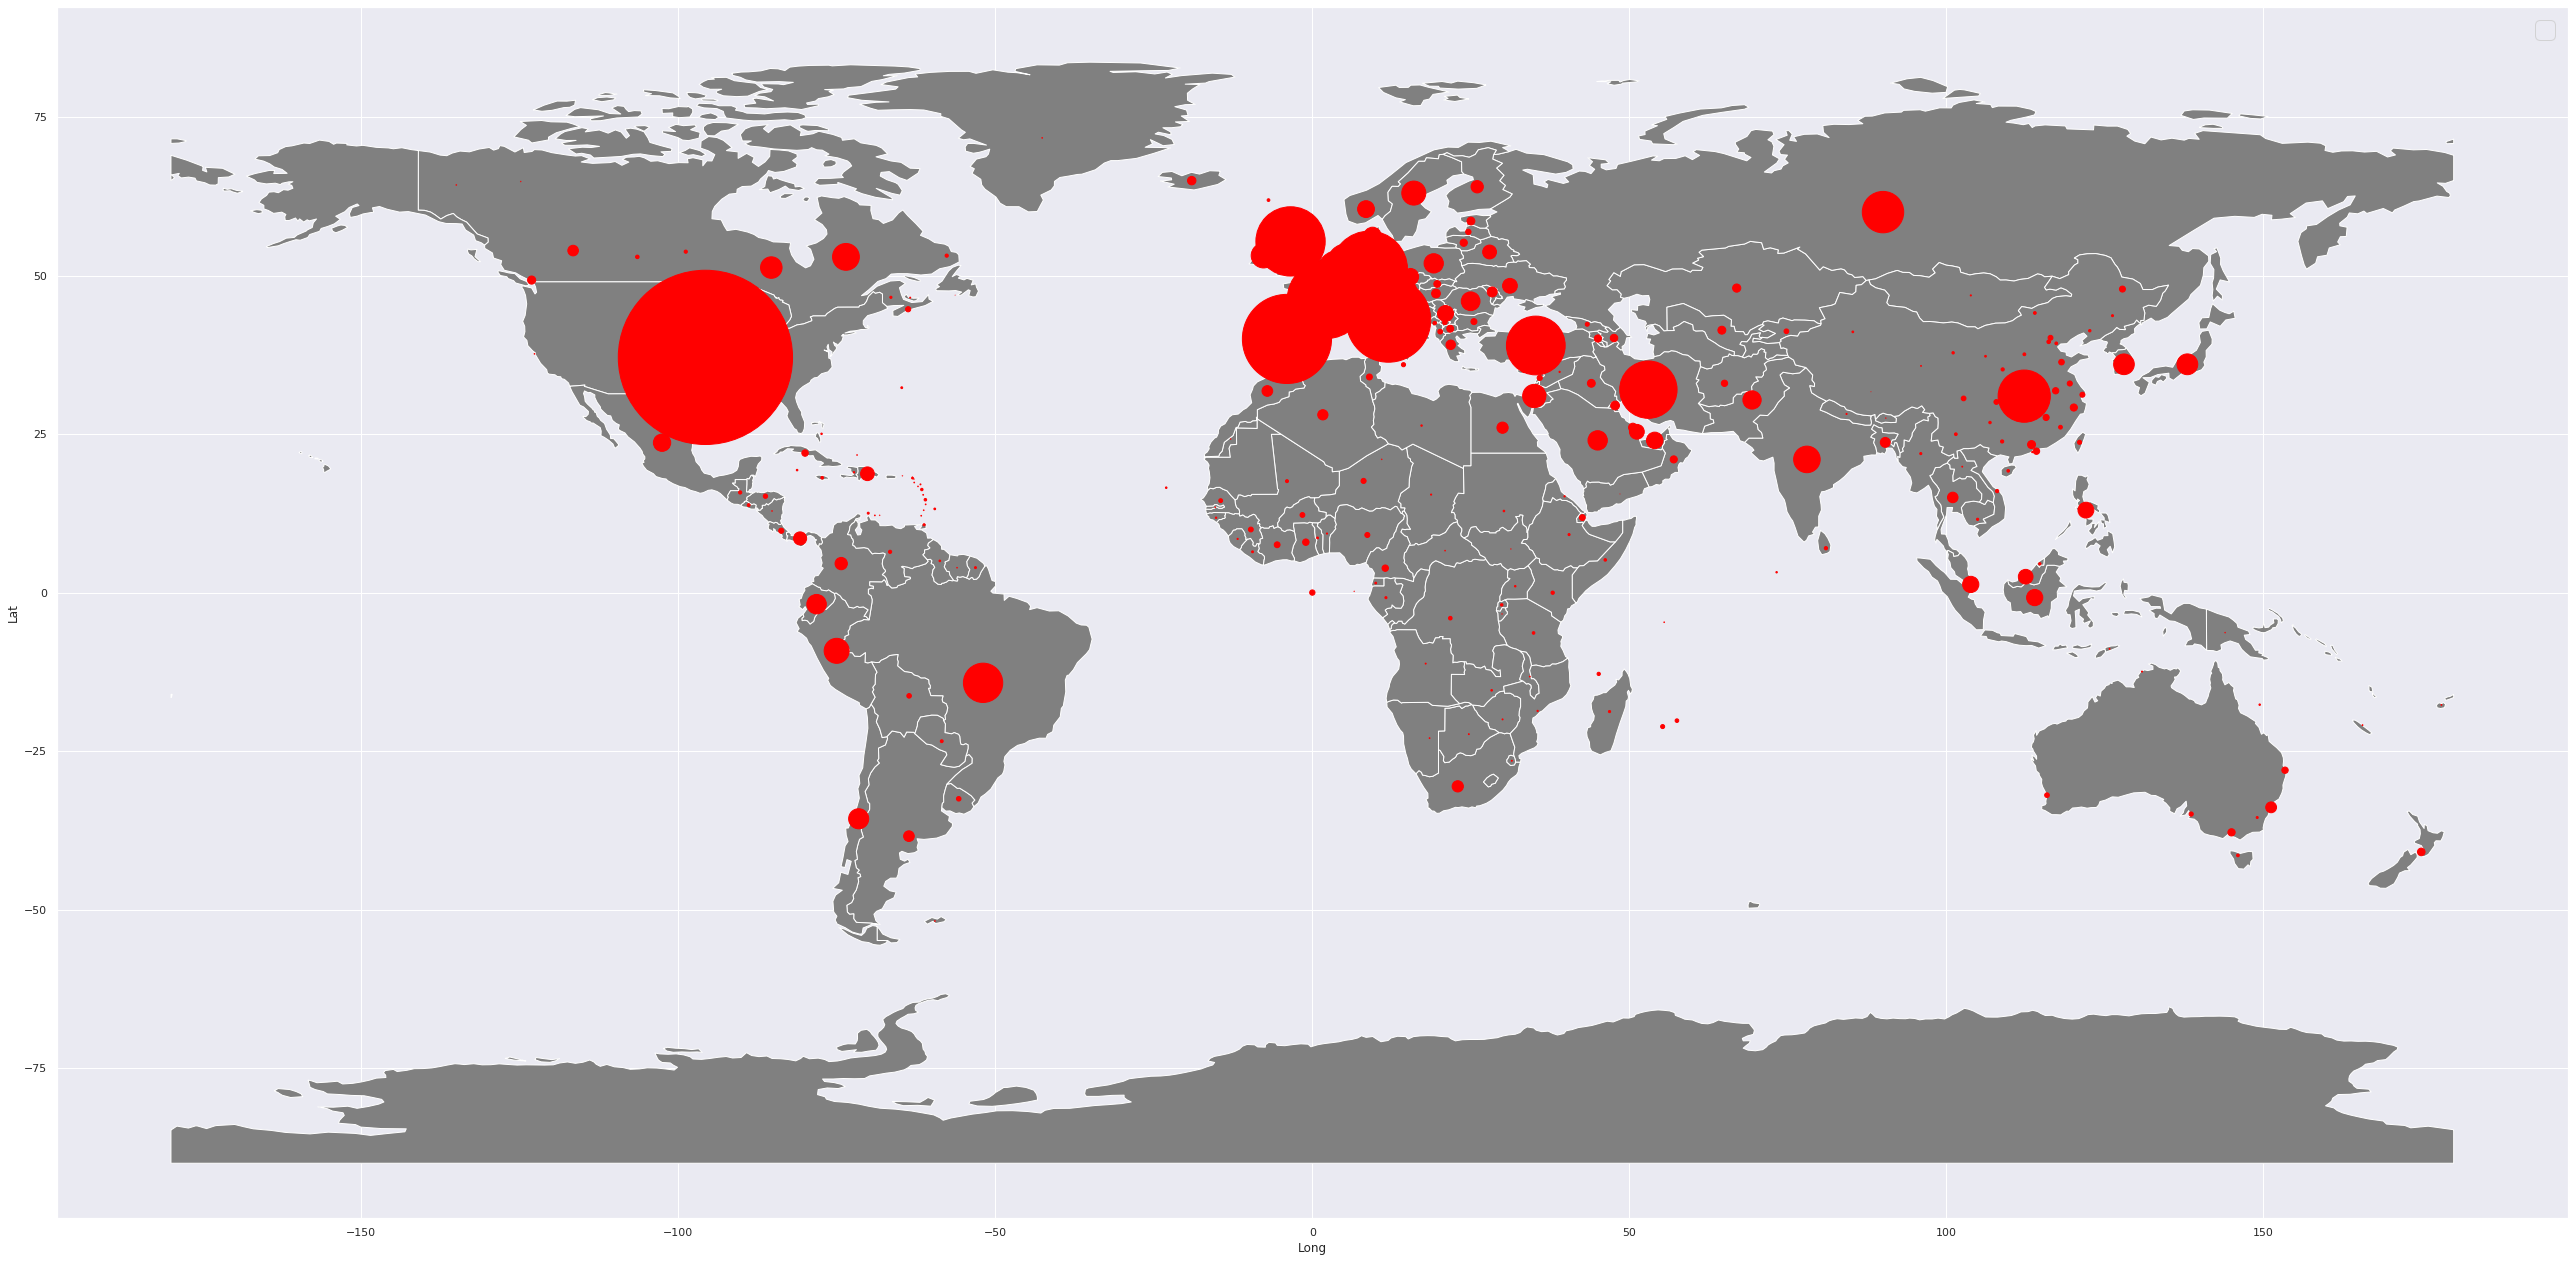

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/25, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4/15/20,67,52096,38092,70853,72600,78311,14026,7616,31470,260
4/16/20,74,54703,40164,74797,77000,78401,14026,7757,33327,286
4/17/20,88,58545,42727,74797,83114,77552,14026,7829,35006,286
4/18/20,97,64840,44927,74797,85400,77614,14026,7937,36587,294


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4/15/20,626,3574,180,9,159,419,3614,125,114,814
4/16/20,642,3751,196,9,164,426,3755,143,114,862
4/17/20,649,4016,214,9,177,442,4126,143,114,923
4/18/20,655,4210,235,9,190,457,4335,163,114,986


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4/15/20,4,95,5,1,6,31,189,5,8,24
4/16/20,4,103,5,1,6,35,196,5,8,27
4/17/20,4,109,7,1,7,41,200,5,8,31
4/18/20,4,116,7,2,7,46,217,5,8,32


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
3/5/20,0,0,0,0,0,0,1,0,0,0
3/6/20,1,0,0,0,0,0,2,0,0,0
3/7/20,1,0,0,0,0,0,2,0,0,0
3/8/20,5,0,0,0,0,0,5,0,0,0
3/9/20,9,0,0,0,0,0,5,0,0,0


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
3/5/20,0,0,0,0,0,0,0,0,0,0
3/6/20,0,0,0,0,0,0,0,0,0,0
3/7/20,0,0,0,0,0,0,0,0,0,0
3/8/20,0,0,0,0,0,0,0,0,0,0
3/9/20,0,0,0,0,0,0,0,0,0,0


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/5/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/6/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
3/7/20,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/8/20,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000
3/9/20,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,21,21,23,23,23,23,23,23,23,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,46,46,47,49,49,53,54,55,55,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,68,71,72,72,73,75,75,75,75,POINT (-59.54320 13.19390)
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,428,445,474,517,549,579,606,649,675,POINT (-63.74430 44.68200)
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,2709,2776,2852,2979,3105,3233,3439,3439,3792,POINT (-74.29730 4.57090)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,577,595,612,618,626,642,649,655,660,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,620,669,726,766,814,862,923,986,1035,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,2759,2967,3167,3286,3614,3755,4126,4335,4680,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,118,125,137,149,159,164,177,190,201,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,83,86,86,86,86,86,96,96,96,POINT (-53.12580 3.93390)


In [36]:
temp.drop([41,82,109,113,115,125, 158,190, 204, 217, 222, 225, 227, 232,233,237, 244, 249,250,251,256], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,geometry
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,21,21,23,23,23,23,23,23,23,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,46,46,47,49,49,53,54,55,55,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,68,71,72,72,73,75,75,75,75,POINT (-59.54320 13.19390)
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,577,595,612,618,626,642,649,655,660,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,620,669,726,766,814,862,923,986,1035,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,2759,2967,3167,3286,3614,3755,4126,4335,4680,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,118,125,137,149,159,164,177,190,201,POINT (-88.89650 13.79420)
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,83,86,86,86,86,86,96,96,96,POINT (-53.12580 3.93390)
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,32,32,32,32,35,35,35,37,37,POINT (-63.05010 18.07080)
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,137,155,156,167,180,196,214,235,257,POINT (-90.23080 15.78350)


In [38]:
len(temp)

21

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'4/18/20'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,4/18/20,4/19/20
0,NaN,Dominican Republic,4335,4680
1,NaN,Panama,4210,4273
2,NaN,Cuba,986,1035
3,NaN,Costa Rica,655,660
4,NaN,Honduras,457,472
5,NaN,Guatemala,235,257
6,NaN,El Salvador,190,201
7,NaN,Jamaica,163,173
8,NaN,Trinidad and Tobago,114,114
9,Aruba,Netherlands,96,97


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,3
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,8,8,8,8,8,8,8,9,9,9
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,4,4,4,4,4,5,5,5,5,5
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,2,2,2,3,3,3,3,4,7,9
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,80,100,109,112,127,131,144,153,153,179
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,3,3,3,3,3,4,4,4,4,5
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,15,16,18,21,21,24,27,31,32,34
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,126,135,173,177,183,189,196,200,217,226
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,6,6,6,6,6,6,6,7,7,7
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
temp_deaths.drop([41,82,109,113,115,125,158,190, 204, 217, 222, 225, 227, 232,233,237, 244, 249,250,251,256], axis=0, inplace=True)

In [50]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,3
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,8,8,8,8,8,8,8,9,9,9
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,4,4,4,4,4,5,5,5,5,5
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,3,3,3,3,3,4,4,4,4,5
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,15,16,18,21,21,24,27,31,32,34
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,126,135,173,177,183,189,196,200,217,226
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,6,6,6,6,6,6,6,7,7,7
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,3,3,5,5,5,5,5,7,7,7


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'4/18/20'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,4/18/20,4/19/20
0,NaN,Dominican Republic,217,226
1,NaN,Panama,116,120
2,NaN,Honduras,46,46
3,NaN,Cuba,32,34
4,Sint Maarten,Netherlands,9,10
5,NaN,Bahamas,9,9
6,NaN,Trinidad and Tobago,8,8
7,NaN,El Salvador,7,7
8,NaN,Guatemala,7,7
9,NaN,Barbados,5,5


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,0,0,0,0,3,3,3,3,3,3
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,5,5,5,6,6,6,6,6,10,10
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,11,11,11,13,13,15,15,15,17,17
24,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
73,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,197,214,270,319,354,452,550,634,634,711
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,42,49,56,62,66,67,74,88,97,112
80,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,51,77,92,121,132,151,171,192,227,255
87,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,5,5,8,8,8,8,8,8,8,8
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,98,108,131,152,162,208,215,268,312,363
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,15,19,21,22,25,30,33,38,43,44


In [59]:
temp_recovered.drop([24,73,87,101,102,106,114,119,154,186,188,202,217, 222, 225, 227,235,236,237, 242], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,0,3,3,3,3,3,3
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,5,5,5,6,6,6,6,6,10,10
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,11,11,11,13,13,15,15,15,17,17
76,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,42,49,56,62,66,67,74,88,97,112
80,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,51,77,92,121,132,151,171,192,227,255
88,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,98,108,131,152,162,208,215,268,312,363
91,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,15,19,21,22,25,30,33,38,43,44
99,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,43,43,51,51,51,51,51,61,64,64
107,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,11,11,11,11,11,13,13,13,19,19
116,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,17,19,19,19,19,19,19,21,21,21


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'4/18/20'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,4/18/20,4/19/20
0,NaN,Dominican Republic,312,363
1,NaN,Cuba,227,255
2,NaN,Panama,122,140
3,NaN,Costa Rica,97,112
4,French Guiana,France,64,64
5,Aruba,Netherlands,44,49
6,NaN,El Salvador,43,44
7,NaN,Jamaica,25,27
8,NaN,Guatemala,21,21
9,NaN,Trinidad and Tobago,21,21


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,19,21,21,23,23,23,23,23,23,23
1,Bahamas,0,0,0,0,0,0,0,0,0,...,42,46,46,47,49,49,53,54,55,55
2,Barbados,0,0,0,0,0,0,0,0,0,...,67,68,71,72,72,73,75,75,75,75
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,558,577,595,612,618,626,642,649,655,660
4,Cuba,0,0,0,0,0,0,0,0,0,...,564,620,669,726,766,814,862,923,986,1035
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,2620,2759,2967,3167,3286,3614,3755,4126,4335,4680
6,El Salvador,0,0,0,0,0,0,0,0,0,...,117,118,125,137,149,159,164,177,190,201
7,French Guiana,0,0,0,0,0,0,0,0,0,...,83,83,86,86,86,86,86,96,96,96
8,St Martin,0,0,0,0,0,0,0,0,0,...,32,32,32,32,32,35,35,35,37,37
9,Guatemala,0,0,0,0,0,0,0,0,0,...,126,137,155,156,167,180,196,214,235,257


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,9,9,9
2,Barbados,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,5,5,5,5,5
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,4,4,4,4,5
4,Cuba,0,0,0,0,0,0,0,0,0,...,15,16,18,21,21,24,27,31,32,34
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,126,135,173,177,183,189,196,200,217,226
6,El Salvador,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,7,7,7
7,French Guiana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,St Martin,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
9,Guatemala,0,0,0,0,0,0,0,0,0,...,3,3,5,5,5,5,5,7,7,7


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,3,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,5,5,5,6,6,6,6,6,10,10
2,Barbados,0,0,0,0,0,0,0,0,0,...,11,11,11,13,13,15,15,15,17,17
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,42,49,56,62,66,67,74,88,97,112
4,Cuba,0,0,0,0,0,0,0,0,0,...,51,77,92,121,132,151,171,192,227,255
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,98,108,131,152,162,208,215,268,312,363
6,El Salvador,0,0,0,0,0,0,0,0,0,...,15,19,21,22,25,30,33,38,43,44
7,French Guiana,0,0,0,0,0,0,0,0,0,...,43,43,51,51,51,51,51,61,64,64
8,St Martin,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,13,13,13,19,19
9,Guatemala,0,0,0,0,0,0,0,0,0,...,17,19,19,19,19,19,19,21,21,21


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
cases_camcar_all.shape

(51, 21)

In [75]:
recovered_camcar_all.shape

(51, 21)

In [76]:
deaths_camcar_all.shape

(51, 21)

In [77]:
active_camcar_all.shape

(51, 21)